In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\HP\Documents\Entities.csv")
df

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168441,168441,17355248,6754,https://www.zameen.com/Property/gulshan_e_maym...,House,26500000,Gadap Town,Karachi,Sindh,25.029909,67.137192,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,26136.096
168442,168442,17355249,680,https://www.zameen.com/Property/gadap_town_gul...,House,12500000,Gadap Town,Karachi,Sindh,25.017951,67.136393,0,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,2178.008
168443,168443,17355250,6757,https://www.zameen.com/Property/gulshan_e_maym...,House,27000000,Gadap Town,Karachi,Sindh,25.015384,67.116330,0,For Sale,6,2019-07-18,Al Shahab Enterprises,Shahmir,26136.096
168444,168444,17355251,6752,https://www.zameen.com/Property/gulshan_e_maym...,House,11000000,Gadap Town,Karachi,Sindh,25.013265,67.120818,0,For Sale,3,2019-07-18,Al Shahab Enterprises,Shahmir,21235.578


Data preprocessing
It is a crucial step in the machine learning pipeline, as the quality of the data greatly impacts the performance of models. Preprocessing involves cleaning, transforming, and encoding data to ensure it is suitable for analysis or machine learning.

The key steps in data preprocessing include:

Handling missing data
Handling duplicated data
Feature scaling
Encoding categorical variables
Handling outliers

In [4]:
# Print column names line by line
for col in df.columns:
    (col)


1. Handling Missing Data

In [6]:

# Check for missing values
print(df.isnull().sum())

# Fill missing numeric values with the column mean
df['price'] = df['price'].fillna(df['price'].mean())

# Fill missing categorical values with the column mode
df['property_type'] = df['property_type'].fillna(df['property_type'].mode()[0])

# Drop rows with too many missing values
df = df.dropna(thresh=len(df.columns) - 3)

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64


2. Handling Duplicated Data

In [8]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Reset the index after removing duplicates
df.reset_index(drop=True, inplace=True)


Number of duplicate rows: 0


3. Feature Scaling



In [10]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling to numeric columns
scaler = MinMaxScaler()
numeric_columns = ['price', 'latitude', 'longitude', 'baths', 'bedrooms', 'Total_Area']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Display scaled data
df.head()


,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,0.00500,G-10,Islamabad,Islamabad Capital,0.364186,0.868238,0.004963,For Sale,0.029412,2019-02-04,NaN,NaN,0.000003
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,0.00345,E-11,Islamabad,Islamabad Capital,0.364525,0.867480,0.007444,For Sale,0.044118,2019-05-04,NaN,NaN,0.000045
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,0.00825,G-15,Islamabad,Islamabad Capital,0.363406,0.866652,0.014888,For Sale,0.073529,2019-07-17,NaN,NaN,0.000006
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,0.02175,Bani Gala,Islamabad,Islamabad Capital,0.364631,0.870792,0.009926,For Sale,0.058824,2019-04-05,NaN,NaN,0.000032
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,0.00350,DHA Defence,Islamabad,Islamabad Capital,0.361171,0.873559,0.007444,For Sale,0.044118,2019-07-10,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,0.000006


4. Encoding Categorical Variables


In [12]:
# One-Hot Encoding for 'property_type' and 'purpose'
df = pd.get_dummies(df, columns=['property_type', 'purpose'], drop_first=True)

# Label Encoding for 'city' (if there are too many categories, consider One-Hot Encoding instead)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['city'] = label_encoder.fit_transform(df['city'])

# Check the encoded columns
df.head()


,Unnamed: 0,property_id,location_id,page_url,price,location,city,province_name,latitude,longitude,...,agency,agent,Total_Area,property_type_Flat,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,purpose_For Sale
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,0.00500,G-10,1,Islamabad Capital,0.364186,0.868238,...,NaN,NaN,0.000003,True,False,False,False,False,False,True
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,0.00345,E-11,1,Islamabad Capital,0.364525,0.867480,...,NaN,NaN,0.000045,True,False,False,False,False,False,True
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,0.00825,G-15,1,Islamabad Capital,0.363406,0.866652,...,NaN,NaN,0.000006,False,True,False,False,False,False,True
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,0.02175,Bani Gala,1,Islamabad Capital,0.364631,0.870792,...,NaN,NaN,0.000032,False,True,False,False,False,False,True
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,0.00350,DHA Defence,1,Islamabad Capital,0.361171,0.873559,...,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,0.000006,False,True,False,False,False,False,True


5. Handling Outliers

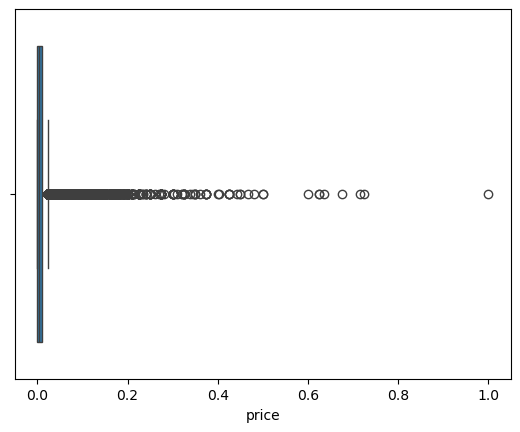

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot to detect outliers in 'price'
sns.boxplot(x=df['price'])
plt.show()

# Remove outliers using z-score
from scipy.stats import zscore
df['price_zscore'] = zscore(df['price'])
df = df[df['price_zscore'].abs() < 3]  # Keep only data within 3 standard deviations

# Drop the temporary z-score column
df.drop(columns=['price_zscore'], inplace=True)


Encoding
Example encoding: If the 'property_type' column is categorical, we can apply Label Encoding or One-Hot Encoding
Encoding 'property_type' using Label Encoding

In [16]:

if 'property_type' in df.columns:
    df['property_type'] = df['property_type'].map({'Apartment': 0, 'House': 1, 'Commercial': 2})  # Example values

# For columns like 'city', one-hot encoding could be used if there are multiple cities
df = pd.get_dummies(df, columns=['city'], drop_first=True)  # One-Hot Encoding for 'city' column

# Show the encoded data
print("Data After Encoding:")
df.head()


Data After Encoding:


,Unnamed: 0,property_id,location_id,page_url,price,location,province_name,latitude,longitude,baths,...,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,purpose_For Sale,city_1,city_2,city_3,city_4
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,0.00500,G-10,Islamabad Capital,0.364186,0.868238,0.004963,...,False,False,False,False,False,True,True,False,False,False
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,0.00345,E-11,Islamabad Capital,0.364525,0.867480,0.007444,...,False,False,False,False,False,True,True,False,False,False
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,0.00825,G-15,Islamabad Capital,0.363406,0.866652,0.014888,...,True,False,False,False,False,True,True,False,False,False
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,0.02175,Bani Gala,Islamabad Capital,0.364631,0.870792,0.009926,...,True,False,False,False,False,True,True,False,False,False
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,0.00350,DHA Defence,Islamabad Capital,0.361171,0.873559,0.007444,...,True,False,False,False,False,True,True,False,False,False


3. Feature and Target Separation

In [18]:
# Assuming 'price' is the target variable, we separate features and target
X = df.drop(['price'], axis=1)  # Features (excluding 'price')
y = df['price']  # Target variable ('price')

# Display features and target
print("Features (X):")
print(X.head())
print("Target (y):")
y.head()


Features (X):
   Unnamed: 0  property_id  location_id  \
0           0       237062         3325   
1           1       346905         3236   
2           2       386513          764   
3           3       656161          340   
4           4       841645         3226   

                                            page_url     location  \
0  https://www.zameen.com/Property/g_10_g_10_2_gr...         G-10   
1  https://www.zameen.com/Property/e_11_2_service...         E-11   
2  https://www.zameen.com/Property/islamabad_g_15...         G-15   
3  https://www.zameen.com/Property/islamabad_bani...    Bani Gala   
4  https://www.zameen.com/Property/dha_valley_dha...  DHA Defence   

       province_name  latitude  longitude     baths  bedrooms  ...  \
0  Islamabad Capital  0.364186   0.868238  0.004963  0.029412  ...   
1  Islamabad Capital  0.364525   0.867480  0.007444  0.044118  ...   
2  Islamabad Capital  0.363406   0.866652  0.014888  0.073529  ...   
3  Islamabad Capital  0.364631  

0    0.00500
1    0.00345
2    0.00825
3    0.02175
4    0.00350
Name: price, dtype: float64

4. Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

# Split the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of training and testing sets
print("Training and Testing Data Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)


Training and Testing Data Shapes:
X_train: (132366, 25) X_test: (33092, 25)
y_train: (132366,) y_test: (33092,)


5. Model Training

In [22]:
for col in df.columns:
    (col)


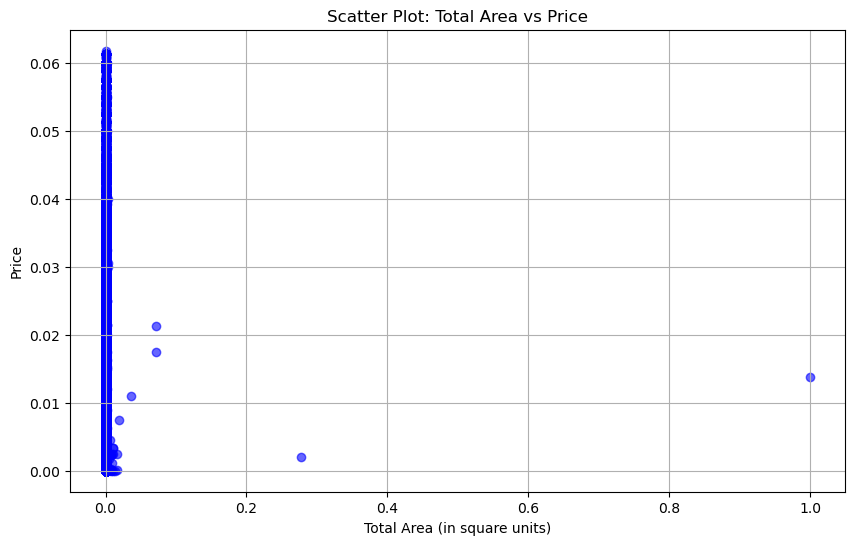

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data loading (replace this with your actual dataset)
# df = pd.read_csv('entities.csv')

# Scatter Plot: Total Area vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Area'], df['price'], alpha=0.6, c='blue')
plt.title('Scatter Plot: Total Area vs Price')
plt.xlabel('Total Area (in square units)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165458 entries, 0 to 168445
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   165458 non-null  int64  
 1   property_id                  165458 non-null  int64  
 2   location_id                  165458 non-null  int64  
 3   page_url                     165458 non-null  object 
 4   price                        165458 non-null  float64
 5   location                     165458 non-null  object 
 6   province_name                165458 non-null  object 
 7   latitude                     165458 non-null  float64
 8   longitude                    165458 non-null  float64
 9   baths                        165458 non-null  float64
 10  bedrooms                     165458 non-null  float64
 11  date_added                   165458 non-null  object 
 12  agency                       121877 non-null  object 
 13  agen

In [25]:
df.head()

,Unnamed: 0,property_id,location_id,page_url,price,location,province_name,latitude,longitude,baths,...,property_type_House,property_type_Lower Portion,property_type_Penthouse,property_type_Room,property_type_Upper Portion,purpose_For Sale,city_1,city_2,city_3,city_4
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,0.00500,G-10,Islamabad Capital,0.364186,0.868238,0.004963,...,False,False,False,False,False,True,True,False,False,False
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,0.00345,E-11,Islamabad Capital,0.364525,0.867480,0.007444,...,False,False,False,False,False,True,True,False,False,False
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,0.00825,G-15,Islamabad Capital,0.363406,0.866652,0.014888,...,True,False,False,False,False,True,True,False,False,False
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,0.02175,Bani Gala,Islamabad Capital,0.364631,0.870792,0.009926,...,True,False,False,False,False,True,True,False,False,False
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,0.00350,DHA Defence,Islamabad Capital,0.361171,0.873559,0.007444,...,True,False,False,False,False,True,True,False,False,False


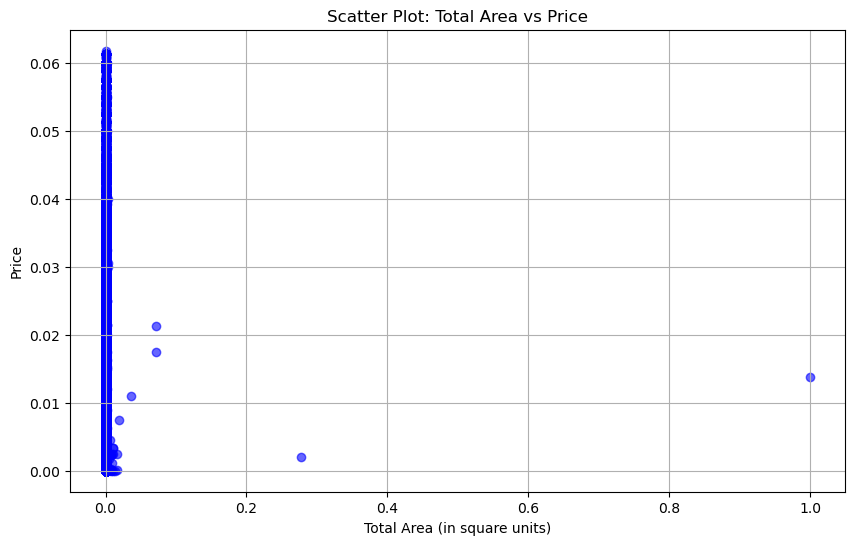

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data loading (replace this with your actual dataset)
# df = pd.read_csv('entities.csv')

# Scatter Plot: Total Area vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Total_Area'], df['price'], alpha=0.6, c='blue')
plt.title('Scatter Plot: Total Area vs Price')
plt.xlabel('Total Area (in square units)')
plt.ylabel('Price')
plt.grid(True)
plt.show()


In [27]:
x1=[["latitude","longitude","baths","bedrooms"]]
y1=["price"]

In [47]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv(r"C:\Users\HP\Documents\Entities.csv")

# Preprocess the data
df = df.drop(columns=['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'date_added', 'agency', 'agent'])  # Drop irrelevant columns

# Handle categorical variables
categorical_cols = ['property_type', 'location', 'city', 'province_name', 'purpose']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df.drop(columns=['price'])
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")



Model Performance:
Mean Squared Error: 182587188600093.5
